Importing all the modules

In [1]:
import datetime as dt
import pandas as pd
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as data
import matplotlib.pyplot as pt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

Specifying the Date

In [2]:
end = dt.date.today()
start = dt.datetime(end.year,end.month-1,end.day)

Collecting the Data set

In [3]:
com_df1 = pd.DataFrame(data.DataReader('BSE/BOM500290', 'quandl', start=start, end=end )['Close'])    #MRF

In [4]:
com_df2 = pd.DataFrame(data.DataReader('BSE/BOM502355', 'quandl', start=start, end=end )['Close'])    #Balkrishna_Ind

In [5]:
com_df3 = pd.DataFrame(data.DataReader('BSE/BOM500877', 'quandl', start=start, end=end )['Close'])    #Apollo_Tyres

In [6]:
com_df4 = pd.DataFrame(data.DataReader('BSE/BOM500878', 'quandl', start=start, end=end )['Close'])    #Ceat

In [7]:
com_df5 = pd.DataFrame(data.DataReader('BSE/BOM530007', 'quandl', start=start, end=end )['Close'])    #JK_Tyre_and_Ind

Renaming the close columns

In [8]:
MRF = com_df1.rename(columns={'Close':'MRF'})
Balkrishna_Ind = com_df2.rename(columns={'Close':'Balkrishna_Ind'})
Apollo_Tyres = com_df3.rename(columns={'Close':'Apollo_Tyres'})
Ceat = com_df4.rename(columns={'Close':'Ceat'})
JK_Tyre_and_Ind = com_df5.rename(columns={'Close':'JK_Tyre_and_Ind'})

Joinig all the data frames

In [9]:
close_df = (((MRF.join(Balkrishna_Ind, how="outer")).join(Apollo_Tyres, how="outer")).join(Ceat, how="outer")).join(JK_Tyre_and_Ind,how="outer")

In [10]:
close_df

,MRF,Balkrishna_Ind,Apollo_Tyres,Ceat,JK_Tyre_and_Ind
Date,,,,,
2018-08-17,73684.50,1368.00,266.40,1437.65,128.85
2018-08-16,73070.80,1394.50,263.75,1436.70,129.75
2018-08-14,73827.10,1335.25,267.15,1436.55,128.55
2018-08-13,73252.15,1227.85,261.40,1396.50,127.85
2018-08-10,74346.25,1252.45,263.90,1399.95,131.10
2018-08-09,75842.95,1254.70,271.85,1397.40,132.70
2018-08-08,76825.35,1247.50,272.85,1397.55,131.90
2018-08-07,77201.45,1224.75,276.30,1405.10,130.00
2018-08-06,76947.50,1228.95,275.65,1380.70,131.60


In [11]:
import seaborn as sns
sns.set_style('whitegrid')

In [12]:
rets = close_df.pct_change()                                    #returns -- one day percent change for each of the stocks
rets.head()

,MRF,Balkrishna_Ind,Apollo_Tyres,Ceat,JK_Tyre_and_Ind
Date,,,,,
2018-08-17,NaN,NaN,NaN,NaN,NaN
2018-08-16,-0.008329,0.019371,-0.009947,-0.000661,0.006985
2018-08-14,0.010350,-0.042488,0.012891,-0.000104,-0.009249
2018-08-13,-0.007788,-0.080434,-0.021523,-0.027879,-0.005445
2018-08-10,0.014936,0.020035,0.009564,0.002470,0.025420


# Pair Plotting

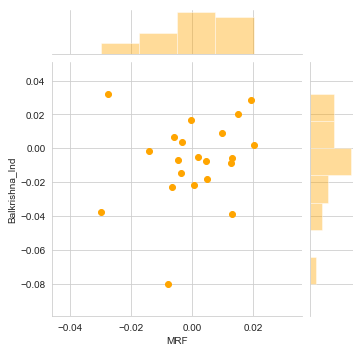

In [20]:
sns.jointplot('Apollo_Tyres','Balkrishna_Ind',rets, kind='scatter',height=5, color='orange')

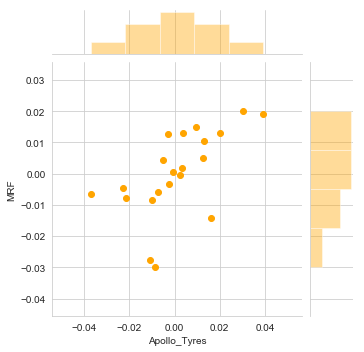

In [14]:
sns.jointplot('Apollo_Tyres','MRF',rets, kind='scatter',height=5, color='orange')

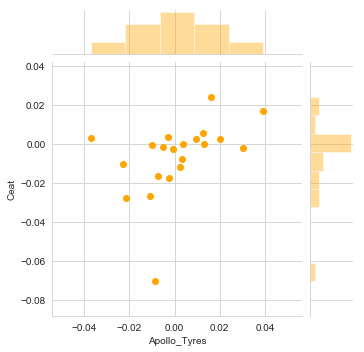

In [15]:
sns.jointplot('Apollo_Tyres','Ceat',rets, kind='scatter',height=5, color='orange')

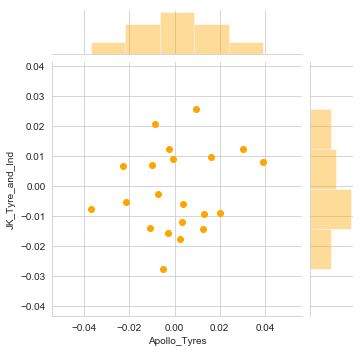

In [16]:
sns.jointplot('Apollo_Tyres','JK_Tyre_and_Ind',rets, kind='scatter',height=5, color='orange')

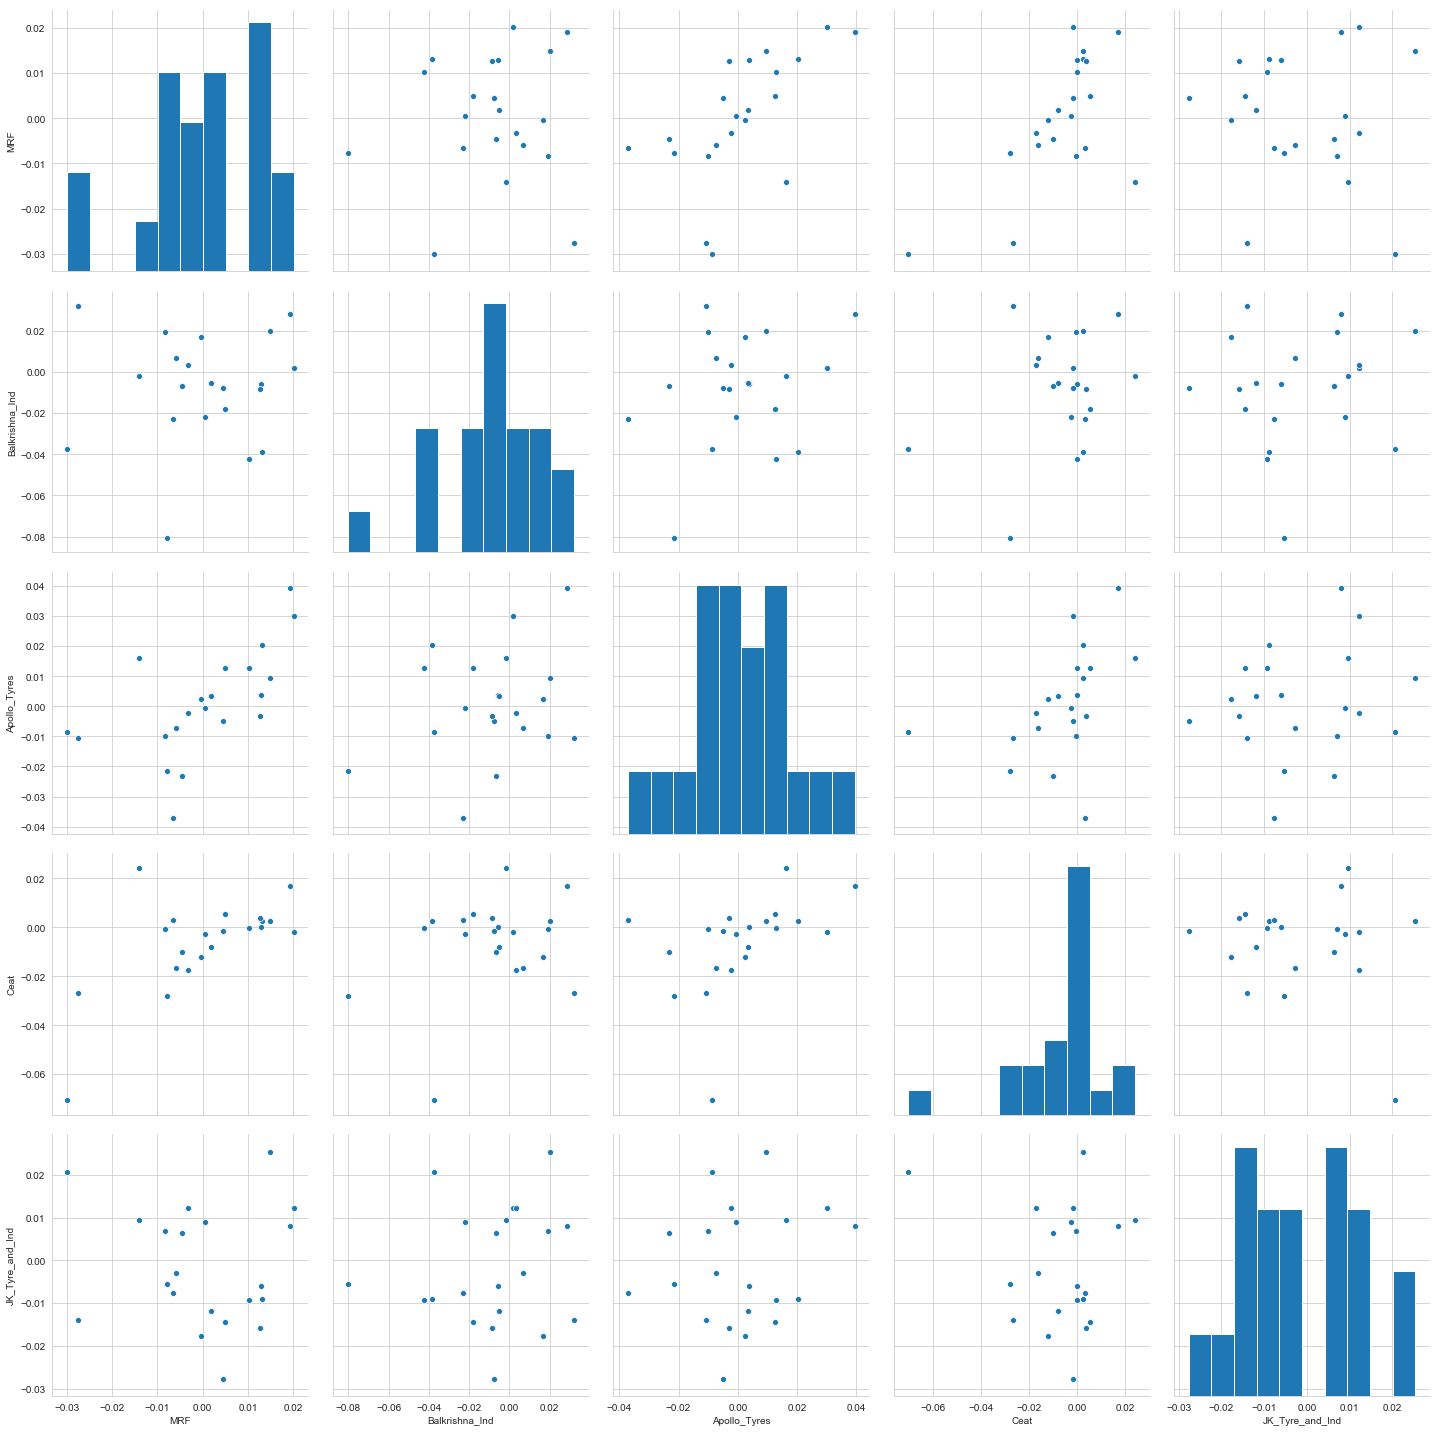

In [17]:
sns.pairplot(rets.dropna(),height=4)

# Correlation Matrix

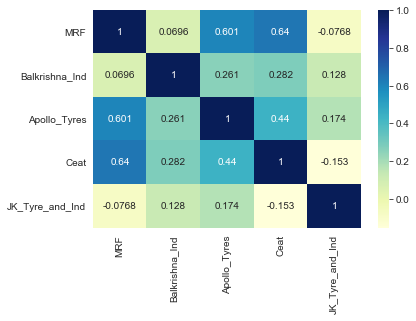

In [18]:
sns.heatmap(rets.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

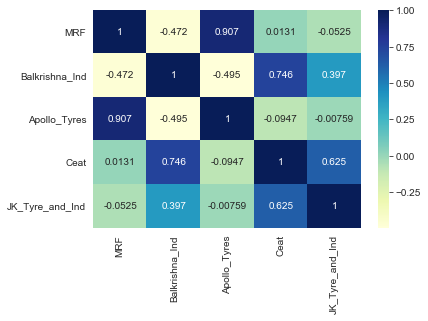

In [19]:
sns.heatmap(close_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

<H2> Risk Return Analysis

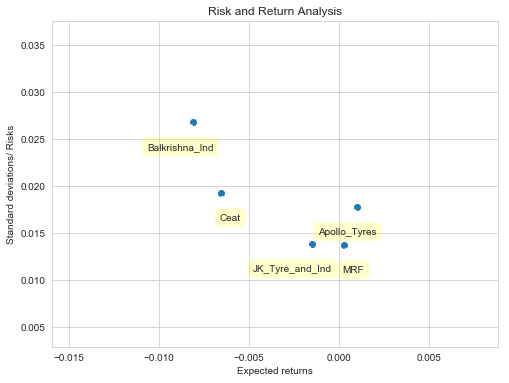

In [20]:
fig, ax = pt.subplots(figsize=(8,6))
pt.scatter(rets.mean(), rets.std())
pt.xlabel('Expected returns')
pt.ylabel('Standard deviations/ Risks')
pt.title('Risk and Return Analysis')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    pt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'top',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [21]:
import numpy as np
import statsmodels.api as sm
X=close_df[['Balkrishna_Ind','MRF','Ceat','JK_Tyre_and_Ind']]
X = sm.add_constant(X)
y=close_df['Apollo_Tyres']
model = sm.OLS(y,X,missing='drop')             #drop rows with missing values
result = model.fit()                           #adjusts the data to model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Apollo_Tyres   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     25.64
Date:                Sat, 18 Aug 2018   Prob (F-statistic):           5.22e-07
Time:                        01:18:00   Log-Likelihood:                -59.594
No. Observations:                  22   AIC:                             129.2
Df Residuals:                      17   BIC:                             134.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -35.9517     54.219     -0.663      0.516    -150.344      78.441
Balkrishna_Ind      0.0257      0.033      0.779      0.447      -0.044       0.095
MRF                 0.0042      0.001      7.276      0.000       0.003       0.005
Ceat               -0.0704      0.042     -1.670      0.113      -0.159       0.019
JK_Tyre_and_Ind     0.4602      0.278      1.658      0.116      -0.125       1.046
==============================================================================
Omnibus:                        3.508   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.173   Jarque-Bera (JB):                1.386
Skew:                          -0.106   Prob(JB):                        0.500
Kurtosis:                       1.789   Cond. No.                     4.73e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Plotting the Predicted values and actual values to the model

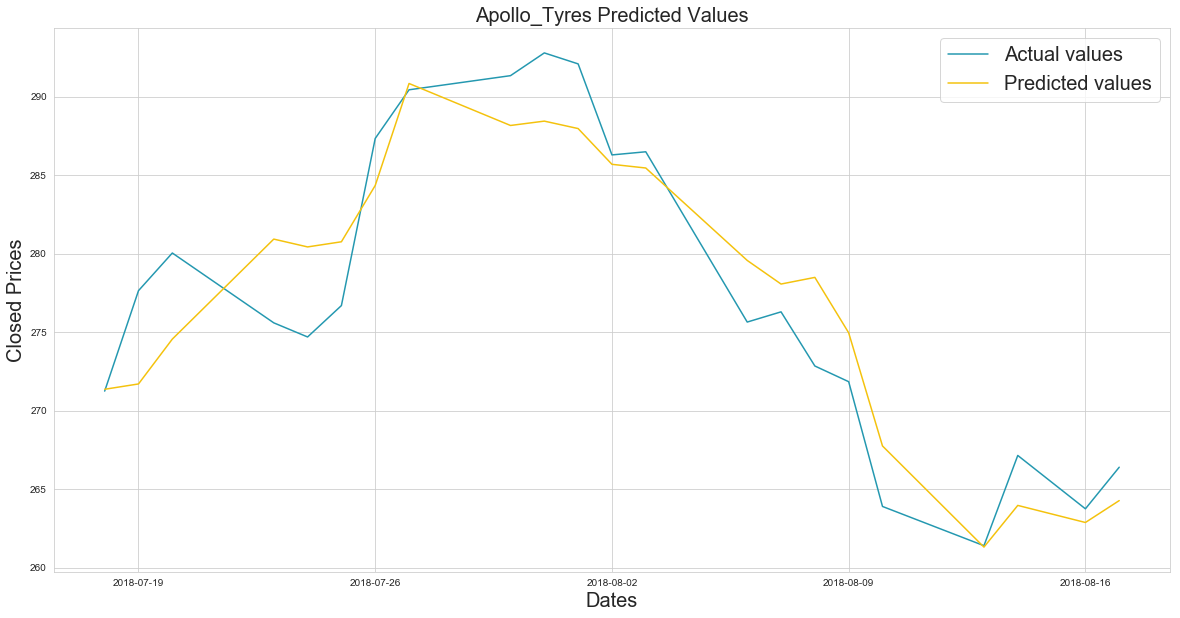

In [22]:
fig, ax = pt.subplots(figsize=(20,10))
ax.plot(y, color="#2498B0", label="Actual values")
ax.plot(result.fittedvalues, color='#f4c20d', label="Predicted values")
ax.set_xlabel('Dates',size=20)
ax.set_ylabel('Closed Prices',size=20)
ax.set_title('Apollo_Tyres Predicted Values',size=20)
p,q = ax.get_legend_handles_labels()
ax.legend(p, q)
pt.legend(prop={'size':20})